In [ ]:
!pip install Textblob &> /dev/null
!pip install -U tomotopy &> /dev/null
!pip install -U pyldavis==2.1.2 &> /dev/null
!pip install -U gensim &> /dev/null

# TextBlob
*  extremely powerful NLP library for Python
*  Tokenization (splitting  a large paragraph into sentences or words) and lemmatization (reducing the word to its root form) can be conducted.
*  For lemmatization: use Word function, and .lemmatize() attribute function
*  Parts of Speech(POS) tagging is also possible via .tags attribute
*  Converting into lowercases


In [ ]:
import pandas as pd
import re
import pprint as pp

import nltk
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob, Word

nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

pd.options.display.max_colwidth = -1

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Mounting Google Drive

In [ ]:
from google.colab import drive # mount Google Drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Reading and Checking Data

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/AI and HR project/Data privacy lem.csv', encoding='utf-8')

DF.head()

Title  ...        Date
0  7 Steps to Tidying Your Digital Life                                      ...  2021-01-01
1  Pandemic Driving Is Still Down, but Will Insurers Grant More Relief?      ...  2021-01-01
2  As Understanding of Russian Hacking Grows, So Does Alarm                  ...  2021-01-02
3  Transcript: President Trump’s Phone Call With Georgia Election Officials  ...  2021-01-04
4  Tech Predictions for 2021                                                 ...  2021-01-04

[5 rows x 4 columns]

In [ ]:
print(len(DF))

CONTENT = DF['text_lemmatized']

90


# Lemmatization, Tokenizing, and Pos Tagging

In [ ]:
## Lemmatization, preprocessing, and POS tagging

POS = ['NN','NNP'] # 일반명사, 고유명사
                         #https://www.geeksforgeeks.org/python-part-of-speech-tagging-using-textblob/

stop_words = stopwords.words('english')
stops = ['percent', 'time', 'group', 'rate', 'place', 'number', 'thing', 'dollar', 'decade', 'area', 'point', 'example', 'said', 'line', 'step', 'side', 'wednesday', 'april', 'year']
stop_words.extend(stops)
stop_words = set(stop_words) # 추가된 불용어에서 중복 제거

def TB_lemmatization(texts):
    # 위에서 트윗 전처리 단계와 동일
    lemma_all = [] # 전체 lemmatization된 결과 저장하는 변수
    words = [] # 개별 lemmatization된 결과 저장하는 변수(이후 위와 동일하게 빈 공간 처리)
    for doc in texts:
        doc = " ".join([Word(word).lemmatize("n") for word in doc.split()]) # Word: Textblob에서 Wordnet 함수를 활용하여 전처리하기 위한 펑션 / lemmatize("n") Word() 안에 들어가는 단어가 명사일 경우 lemmatize 처리
        doc = TextBlob(doc)                                                  # NLTK, Wordnet을 기반으로 하여 텍스트 처리를 수월하게 할 수 있도록 다양한 기능을 많이 포함

        for word, tag in doc.tags:
            if(len(word) < 4 or word.lower() in stop_words): # manually 추가한 stopword는 소문자이기 때문에 .lower()를 통해 소문자 처리한 단어를 검사할 수 있도록 지정
                continue
            if tag in POS:
                words.append(word)

        words = " ".join(words).lower() # POS에 해당하는 단어들을 소문자처리하여 " " 단위로 묶음
        lemma_all.append(words)
        words = []

    return lemma_all

CONTENT_PREP = TB_lemmatization(DF['text_lemmatized'])

In [ ]:
CONTENT_PREP[0]

'auto insurance company customer credit refund premium risk accident road consumer advocate insurer driver break habit accident interest drop report accident datum state week justice crash level state accident period study insurer report insurer relief summer drop accident letter state insurance commissioner refund amount report company reduction adjustment expense letter insurer increase profit auto insurance business part auto crash instance quarter profit income premium claim quarter month auto accident customer premium credit refund company spokesman auto claim datum action insurer auto customer vice president industry customer payment endeavor insurance industry claim hurricane wildfire industry help insurer change pattern industry auto index response falloff claim auto insurance relief spring customer payment month report state regulator education fund affiliate relief insurer state customer month premium relief state insurer farm relief competitor report state farm instance poli

*  Organizing time periods
*  You don't have to process this, Just ingore it this time

In [ ]:
# DF['Year'] = DF['Time'].str.split(',').str[1] # DF['Date']의 값이 mm dd, yyyy로 구성되어 있는데 , 단위로 분리한 뒤 두번째 값만 저장
# DF['Year'] = DF['Year'].str.split(' ').str[1] # 이후 ' yyyy HH:MM am'로 구성되어 제거되지 않는 부분이 있어 첫번째 space 처리 후 두번째 값인 yyyy 만 저장
# DF['Year'] = DF['Year'].str.replace('Updated', '')

# Adding 'Allwords' as New Variable into Data

In [ ]:
DF['Allwords'] = CONTENT_PREP

DF.head()

Title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Saving Data after Preprocessing

In [ ]:
DF.to_csv('/content/drive/MyDrive/AI and HR project/DataPr.csv', encoding = 'utf-8-sig',
           index_label = False, index = False)

# Taking Care of Yearly Count, but Ignore it This Time

In [ ]:
# DF['Year'].value_counts().sort_index().plot.bar() # DF['Year'] 의 변수들을 개수만 카운트하여 value_counts() 인덱싱한 뒤sort_index() 바그래프로 표현

# Creating DTM, and Dictonary

In [ ]:
## Word-count

vec = CountVectorizer().fit(CONTENT_PREP) # 전처리된 기사를 구성하는 단어들을 딕셔너리 형태로 구현
bow = vec.transform(CONTENT_PREP) # 전처리된 기사-키워드를 DTM 형태로 변환

sum_words = bow.sum(axis=0)
sum_words.shape[1] # 전체 키워드 갯수

1792

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] # vec.vocabulary_.items() 은 전체 딕셔너리를 (word, idx)의 튜플 형태로 제시하는데
                                                                                  # sum_words[0, idx]): word와 짝인 idx 순서를 sum_words에서 인덱싱한 값(=idx번째 단어의 빈도)을 word와 다시 매칭
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True) # sorted 함수의 기준을 key 값에 입력하는데 lambda x: x[1] (단어, 빈도의 튜플 형태이므로 0일 경우 단어 순서 1이면 단어 빈도 기준) reverse=True 내림차순

for word, freq in words_freq[0:100]:
    print(word, freq)

## 빈도를 확인하면서 자주 나오는 키워드 중 불용어 처리가 필요한 것은 위의 불용어 처리 과정에서 추가하는 방식으로 제거하면 됨
## 그러나 빈도순에서는 확인되지 않는 키워드나 특정 주제(특정 언어로 이뤄진 기사나 트윗, 동음이의어로 수집되는 자료 등) 중에서 토픽모델링 단계에서 과대대표되는 경향이 있으므로 manually 하게 기사나 트윗을 확인하면서 제거하는 것 필요
## (여기서는 해당 작업 거치지 않음)

company 504
datum 334
privacy 252
information 238
policy 194
health 162
state 154
service 140
ballot 138
government 136
technology 134
week 132
consumer 110
vote 104
case 98
system 96
user 96
rule 92
election 90
term 90
surveillance 90
month 88
lawyer 88
regulation 84
agency 82
study 80
administration 80
order 80
medium 78
tech 78
power 76
problem 76
change 74
country 74
woman 74
eviction 74
customer 72
security 72
court 72
market 72
apple 72
industry 70
regulator 70
worker 70
business 68
trump 68
world 66
name 66
action 64
access 60
question 58
software 58
family 58
part 54
work 54
employee 54
practice 54
democracy 54
office 52
issue 52
internet 52
parler 52
plan 50
president 48
hour 48
agreement 46
newsletter 46
protection 46
site 46
measure 44
city 44
effort 44
share 44
whatsapp 44
insurance 42
operation 42
child 42
photo 42
statement 40
money 40
device 40
intelligence 40
machine 40
person 40
care 40
death 40
society 40
insurer 38
letter 38
detail 38
tool 38
network 38
attack 38
cal

In [ ]:
## LDA process

# Importing Libraries for LDA

In [ ]:
import pandas as pd
import re
import numpy as np
import tomotopy as tp
import collections

import gensim
import pyLDAvis

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/AI and HR project/DataPr.csv', encoding='utf-8')

DF.head()

Title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Computing Coherence and Perplexity Scores
*  coherence measuring how well the topics are extracted,
*  perplexity measuring how well the model generalizes..
*  The models with the lowest perplexity and highest coherence are considered "the best"

In [ ]:
# tomotopy의 lda 결과를 gensim에서 활용가능한 자료구조 형태로 변환하는 함수

def get_coherence(model, coherence=None, topn=None, processes=None): # None으로 하면 자동으로 default...밑에서 값을 정해 줬으니, 정해진 값이 들어온다
    """
    model: tomotopy lda
    coherence: coherence 값을 구하는 알고리즘(u_mass 나 c_v 를 사용하는데 일반적으로 c_v 활용)
    topn: coherence 계산할 때 고려할 토픽 키워드
    processes: workers와 유사한 기능
    """

    # tomotopy 에서 토픽-키워드간 데이터 추출
    topics = []
    for k in range(model.k): #model.k에서 뽑는게 숫자이기 때문에 레인지를 쓴다...k에 해당되는 내용이 없고
        word_probs = model.get_topic_words(k, topn) #토픽에 해당되는 키워드에 대해 확률값을 넣어주는 것
        topics.append([word for word, prob in word_probs])

    # tomotopy에서 토픽-문서간 데이터 추출하여 gensim에서 활용가능한 코퍼스 구현
    texts = []
    corpus = []
    for doc in model.docs: #여긴 왜 range를 안넣나?...실제 문서의 내용을 가져와야 하기 때문에...리스트 형태로 있는 문서의 내용을 가져온다...doc는 내용이 있다...
        words = [model.vocabs[token_id] for token_id in doc.words] #doc.words가 어디서 왔나? '토모토피에서 자동적으로 정해 놓은 변수이다'
        texts.append(words) #젠심 단계에서 lda를 하기 위한 신문기사...토모토미에서 해놓은 것은 되돌리는 것....
        freqs = list(collections.Counter(doc.words).items()) #왜 .items()가 붙은거지? collections.Counter는 반드시 젠심은 아니다...collectios 라이브러리에서...items() 함수는 튜플(x=y...검찰=100)...전체를 list형태로..
                  #list를 통해서 각각 문서들에 대해서 진행함.....list는 전체를 하나의 집합으로 묶어 준다...
        corpus.append(freqs)

    # gensim 형태의 자료구조 형태로 변환
    id2word = dict(enumerate(model.vocabs)) #model.vocabs는 변수 아닌가? enumerate는 전체 문서에서 특정 단어가 언급된 숫자를 말한다...전체 오천개에서 검찰=1500번 이런 식으로....dict는 튜플형태로??
    dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus, id2word) # tomotopy에 활용된 키워드들을 (단어, 빈도) 구조의 형태로 변환

    cm = gensim.models.coherencemodel.CoherenceModel(
        topics=topics,
        texts=texts,
        corpus=corpus,
        dictionary=dictionary,
        coherence=coherence, # (바로 아래에 있는 'c_v', 10, 5를 넣는 것임...)
        topn=topn,
        processes=processes,
    )

    return cm.get_coherence() #그냥 cm을 리턴하는게 아니고 여기에 또 .get_coherence()를 넣는것? 왜?; 이건 리턴했는데, 아래에서 전혀 사용되지 않네? return을 안하면 해당하는 값을 가져오지 않는다..cm은 속성값이 나온다...

In [ ]:
# perplexity, coherence 값을 확인하는 함수

def compute_coherence_values(doc, start, limit, step):
    for i in range(start, limit, step):
        mdl = tp.LDAModel(k=i)
        for text in doc:
            token = text.strip().split()
            if token:
                mdl.add_doc(token)

        mdl.train(iter=100, workers=0)
        coherence_value = get_coherence(mdl, coherence='c_v', topn=10, processes=10)

        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,
            mdl.ll_per_word,
            mdl.perplexity,
            coherence_value
            )
        )
        coherence_values.append(coherence_value)
        perplexities.append(mdl.perplexity)


In [ ]:
DF['Allwords'].replace('', np.nan, inplace=True) # https://codesample-factory.tistory.com/1081 #비교적 짧은 단문의 경우....비어있는 값이 우연히 생길 수 있어....np.nan으로 대체하는 것(NaN)
DF.dropna(subset=['Allwords'], inplace=True)

limit = 50 # maximum topic number
start = 10; # minimum topic number
step = 5; # step unit

coherence_values = []
perplexities = []

# coherence 확인은 gensim의 프로세싱을 따르기 때문에 시간이 상당히 소요됨
compute_coherence_values(DF['Allwords'], start, limit, step)

Topic: 10	Log-likelihood: -6.6360581196451704	Perplexity: 762.0850164786947	Coherence: 0.4232986279450266
Topic: 15	Log-likelihood: -6.481044939103173	Perplexity: 652.6525722738733	Coherence: 0.4815179678625844
Topic: 20	Log-likelihood: -6.389760245631633	Perplexity: 595.7137375943084	Coherence: 0.5188168779494013
Topic: 25	Log-likelihood: -6.329104937844987	Perplexity: 560.654548537195	Coherence: 0.5087753157628715
Topic: 30	Log-likelihood: -6.18603381897896	Perplexity: 485.9150522329949	Coherence: 0.5491785115254142
Topic: 35	Log-likelihood: -6.204561586337015	Perplexity: 495.0018927689397	Coherence: 0.5456876118634882
Topic: 40	Log-likelihood: -6.128410103317576	Perplexity: 458.70628501947596	Coherence: 0.5693714050158157
Topic: 45	Log-likelihood: -6.167288272032661	Perplexity: 476.8911520268931	Coherence: 0.5572853687677858


# Creating Graphs

In [ ]:
x = range(start, limit, step)

mdl_check = pd.DataFrame(list(zip(x, perplexities, coherence_values)), columns=['Num Topics', 'Perplexity', 'Coherence']) # from np.array ro pd.dataframe

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f15b71ac190>,
      dtype=object)

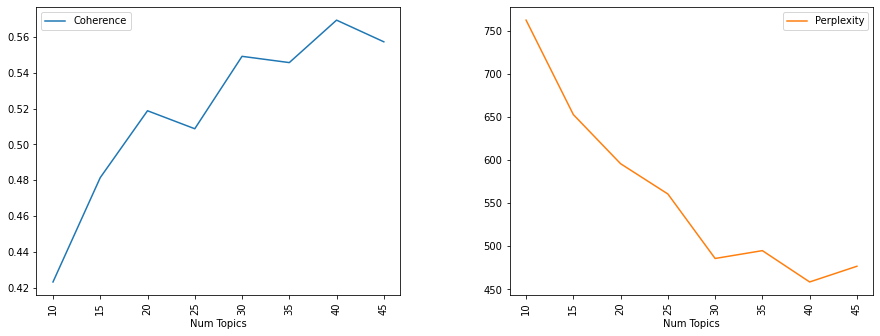

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) # nrows=1 ? ncols=2?..2개 그림 배치를 어떻게?....행1개 열2개...subplots이 쪼개는 것....fig는 figsize에 관한 것....15.5가 아래 눈에 보이는 사이즈.....(가로..세로)

plt.subplots_adjust(left=0.125, #여백 간의 관계를 adjust.... 그림이 여려개 있을때 공간과 여백 설정....left=.125...반으로 쪼갠 것 내에서 배치를 어떻게...wspace는 두 그림 사이의 거리...hspace는 필요가 없다...
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

pd.pivot_table(mdl_check, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True)  # perplexity와 coherence의 위치? \표시는 .plot 과 연결. .plot을 어떻게 그릴거냐? 선 그래프...rotation 가로축 로테이션..위의 ax.
                                                      # subplots=True는 두개를 나눈다....
                                                      # \.plot??. 아래 상단에 나오는 array....는 뭐지? 없애도 되지 않나?

# Training Data for Best Fitted Model

In [ ]:
## Test by 15 topics

mdl = tp.LDAModel(k=30)

for text in DF['Allwords']:
    token = text.strip().split()
    if token:
        mdl.add_doc(token)
mdl.train(iter=100, workers=0)

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

Top 10 words of topic #0
[('study', 0.09079384058713913), ('rule', 0.07044700533151627), ('bird', 0.05323044955730438), ('health', 0.039144180715084076), ('administration', 0.036013901233673096), ('science', 0.03131847456097603), ('pollution', 0.03131847456097603), ('transparency', 0.02505791187286377), ('measure', 0.02349277026951313), ('decision', 0.018797345459461212)]
Top 10 words of topic #1
[('surveillance', 0.06949817389249802), ('democracy', 0.04696127027273178), ('society', 0.03381474316120148), ('capitalism', 0.028180519118905067), ('coup', 0.02630244381725788), ('chaos', 0.020668217912316322), ('truth', 0.020668217912316322), ('information', 0.018790142610669136), ('operation', 0.018790142610669136), ('medium', 0.015033992938697338)]
Top 10 words of topic #2
[('insurer', 0.07554294168949127), ('auto', 0.061254896223545074), ('insurance', 0.05717260017991066), ('company', 0.04492570087313652), ('state', 0.042884550988674164), ('premium', 0.03676110506057739), ('relief', 0.028

# Visualizing Results via pyLDAvis

# pyLDAvis

* topic_term_dists: array-like, shape (n_topics, n_terms)
* Matrix of topic-term probabilities. Where n_terms is len(vocab).

* doc_topic_dists :array-like, shape (n_docs, n_topics)
* Matrix of document-topic probabilities.

* doc_lengths :array-like, shape n_docs
*The length of each document, i.e. the number of words in each document. The order of the numbers should be consistent with the ordering of the docs in doc_topic_dists.

* vocab :array-like, shape n_terms
* List of all the words in the corpus used to train the model.

* term_frequency :array-like, shape n_terms
* The count of each particular term over the entire corpus. The ordering of these counts should correspond with vocab and topic_term_dists.

In [ ]:
## Pyldavis process

topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

In [ ]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency,
    mds='mmds'
)

pyLDAvis.display(prepared_data)

## 몇몇 외래어들이 하나의 토픽을 구성하는 것 확인할 수 있음(토픽 24, 25)
## 상기한 것처럼 이러한 자료들은 직접 자료를 확인하면서 raw data를 확인하는 단계에서 제거하는 과정 필요